<a href="https://colab.research.google.com/github/ikikika/data_science/blob/titanic-kaggle/titanic-kaggle/titanic_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Description
Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Data Collection

In [4]:
import pandas as pd

train = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/titanic-kaggle/titanic-kaggle/test.csv')

# Exploratory Data Analysis (EDA)


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
* Survived: 0 = no, 1 = yes
* pclass: Ticket Class 1 = 1st, 2 = 2nd, 3 = 3rd
* sibsp: siblings/spouses aboard the titanic
* parch: parents/children aboard the titanic
* ticket: Ticket Number
* cabin: Cabin number
* embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [22]:
# Use the below functions to get more info about the data
train.shape
train.info() 
# missing info in Age, Cabin and Embarked fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
test.shape
test.info()
# missing data in Age, Fare, Cabin and Embarked fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Data Visualisation
Visualise the relationship between 'Survived' column and other columns

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [35]:
# for simplification, we can write a function called bar_chart to plot the chart of 'Survived' against other features.
# eg, if we want to compare 'Survived' with 'Sex',
#print( train['Survived'] ) # pick out all the values in the 'Survived' column
#print( train['Survived']==1 ) # FILTER out the rows where 'Survived' is 1
#print( train[train['Survived']==1] ) # PICK out all the rows where 'Survived' is 1 (means this passenger survived)
#print( train[train['Survived']==1]['Sex'] ) # pick out all the values in the 'Sex' column where the 'Survived' column is 1
print( train[train['Survived']==1]['Sex'].value_counts() ) # get the counts of the number of rows grouped by 'Sex' column

female    233
male      109
Name: Sex, dtype: int64


In [37]:
# from the breakdown above, write the function
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()

  df = pd.DataFrame([ survived, dead])
  df.index = [ 'Survived', 'Dead' ]
  df.plot(kind='bar', stacked=True, figsize=(10,5) )

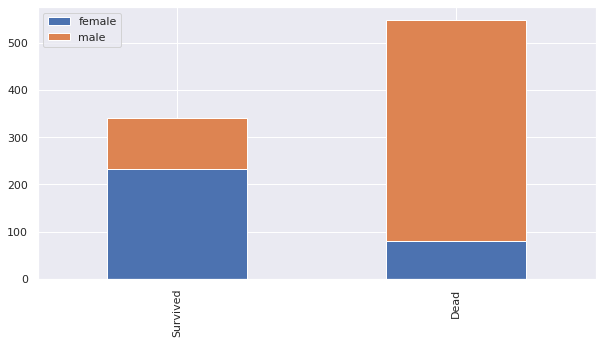

In [38]:
bar_chart('Sex')

From the bar charts, we can see that women are more likely to survive than men.